# Labeled Faces in the Wild (LFW)

## Image Number Distribution

In [10]:
import sys
sys.path.append('../src')

from utils import plot_gallery

In [11]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt

In [12]:
lfw_people = fetch_lfw_people(data_home="../data", resize=1)
images = lfw_people.images
print("Images shape", images.shape)
labels = lfw_people.target
print("Labels shape", labels.shape)
target_names = lfw_people.target_names
print("Number of people", len(target_names))

Images shape (13233, 125, 94)
Labels shape (13233,)
Number of people 5749


In [13]:
count = np.bincount(labels)
assert len(count) == len(target_names)
# Sort by count
sort_idx = np.argsort(count)[::-1]
sort_count = count[sort_idx]
print("Top 10 number of faces", sort_count[:10])
print("Index of top 10", sort_idx[:10])
print("Last 10 number of faces", sort_count[-10:])
print("Index of last 10", sort_idx[-10:])

Top 10 number of faces [530 236 144 121 109  77  71  60  55  53]
Index of top 10 [1871 1047 5458 1404 1892  373 2175 2941 2453 2682]
Last 10 number of faces [1 1 1 1 1 1 1 1 1 1]
Index of last 10 [3504 3506 3519 3509 3510 3511 3512 3513 3518    0]


In [14]:
# # Create a dictionary with the number of images per person
# indices = np.arange(len(count))
# counter = dict(zip(indices, count))
lt_20 = sort_count < 20
print(len(sort_idx[lt_20]), "people with less than 20 images")
gt_70 = sort_count > 70
print(len(sort_idx[gt_70]), "people with greater than 70 images")

5687 people with less than 20 images
7 people with greater than 70 images


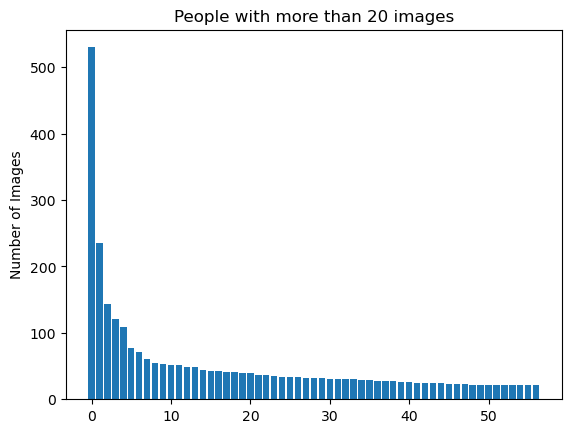

In [15]:
gt_20 = sort_count > 20
cnt = sort_count[gt_20]
plt.bar(np.arange(len(cnt)), cnt)
plt.ylabel("Number of Images")
plt.title("People with more than 20 images")
plt.show()

## Face Visualization

In [16]:
# Get people with more than 70 images

gt_70 = sort_count > 70
lbls = sort_idx[gt_70]
tgts = target_names[lbls]
cnt = sort_count[gt_70]

imgs = []
imgs_label = []
for i, l in enumerate(labels):
    if l in lbls:
        imgs.append(images[i])
        imgs_label.append(l)
imgs = np.array(imgs)
imgs_label = np.array(imgs_label)

print("People's names (> 70 images)", tgts)
print("Labels:", lbls)
print("Image numbers:", cnt)
print("Imgs shape", imgs.shape)

People's names (> 70 images) ['George W Bush' 'Colin Powell' 'Tony Blair' 'Donald Rumsfeld'
 'Gerhard Schroeder' 'Ariel Sharon' 'Hugo Chavez']
Labels: [1871 1047 5458 1404 1892  373 2175]
Image numbers: [530 236 144 121 109  77  71]
Imgs shape (1288, 125, 94)


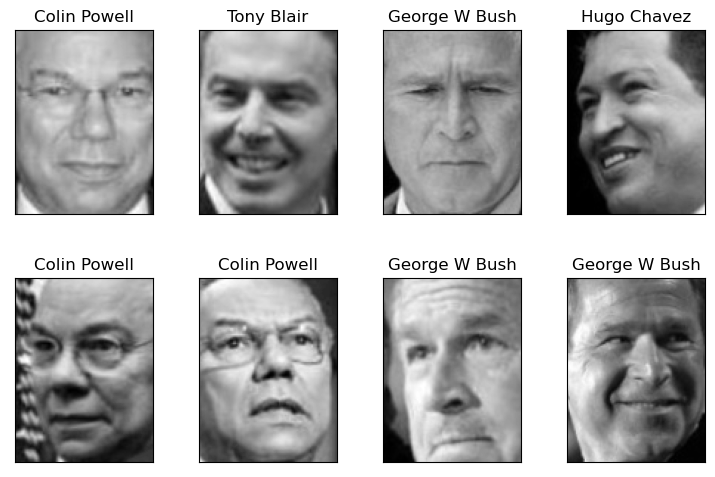

In [17]:
imgs_title = np.array([target_names[l] for l in imgs_label])
idx = np.random.randint(0, len(imgs), 8)
plot_gallery(imgs[idx], imgs_title[idx], n_row=2, n_col=4)